<div style="font-family: 'Poppins'; font-weight: bold; letter-spacing: 0px; color: #FFFFFF; font-size: 300%; text-align: left; padding: 15px; background: #0A0F29; border: 8px solid #00FFFF; border-radius: 15px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5);">
    Ph.D. Stipends by research topic and universities<br>
</div>

# <div style="background-color:#0A0F29; font-family:'Poppins', cursive; color:#E0F7FA; font-size:140%; text-align:center; border: 2px solid #00FFFF; border-radius:15px; padding: 15px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Initialize</div>

<img src="https://i.imgur.com/ONOSXWy.jpg" width="700px">

Photo by [Pang Yuhao](https://unsplash.com/@yuhao) on Unsplash

In [1]:
# Execution time tracking
start_time <- Sys.time()

# Load libraries
# For exploratory data analysis
suppressPackageStartupMessages(library(DataExplorer))

# For data cleaning and wrangling
suppressPackageStartupMessages(library(tidyverse))

# To read Excel files
suppressPackageStartupMessages(library(readxl))

# For improved print functionality
suppressPackageStartupMessages(library(glue))

# For printing nice tables
suppressPackageStartupMessages(library(knitr))

# For printing nice tables with extended capabilities
suppressPackageStartupMessages(library(kableExtra))

# For statistical analysis and publication-ready plots
suppressPackageStartupMessages(library(ggpubr))

# For multi-plot figures
suppressPackageStartupMessages(library(patchwork))


# Define default colors pallettes
# http://www.cookbook-r.com/Graphs/Colors_(ggplot2)/
# Define color scheme
cbPalette <- c("#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")

# https://sashamaps.net/docs/tools/20-colors/
palette <- c('#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000')

# Set up default ggplot theme
# https://stackoverflow.com/questions/41717154/how-to-set-themes-globally-for-ggplot2
# https://rstudio.github.io/thematic/
theme_set(theme_pubr())

# Load the dataset
df <- read_csv("../input/phd-stipends/csv")

Warning message:
“replacing previous import ‘data.table:::=’ by ‘ggplot2:::=’ when loading ‘DataExplorer’”
Parsed with column specification:
cols(
  University = col_character(),
  Department = col_character(),
  `Overall Pay` = col_character(),
  `LW Ratio` = col_double(),
  `Academic Year` = col_character(),
  `Program Year` = col_character(),
  `12 M Gross Pay` = col_character(),
  `9 M Gross Pay` = col_character(),
  `3 M Gross Pay` = col_character(),
  Fees = col_character(),
  Comments = col_character()
)



# <div style="background-color:#0A0F29; font-family:'Poppins', cursive; color:#E0F7FA; font-size:140%; text-align:center; border: 2px solid #00FFFF; border-radius:15px; padding: 15px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Abstract</div>

This project aims to clean up and analyze the data set of Ph. D. students salaries by universities and departments over time.
I performed the analysis with  R and the tidyverse libraries.
For the data cleaning, I excluded the variables containing a majority of missing values, combined similar departments, and separated the universities per location.
The significant highlights from the analysis are:  

* The majority of responders are from the USA, data collection from non-USA universities started in 2013
* The students stipend and living wages are higher in the USA.
* The stipends do not increase with experience
* The Ph.D. stipends had a significant decrease around the 2008 crisis.
* The Ph.D. stipends are not equal between departments.

# <div style="background-color:#0A0F29; font-family:'Poppins', cursive; color:#E0F7FA; font-size:140%; text-align:center; border: 2px solid #00FFFF; border-radius:15px; padding: 15px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Method</div>

The Data set, version 7, was downloaded on [Kaggle](https://www.kaggle.com/paultimothymooney/phd-stipends/data) on the 2020-07-12 

# <div style="background-color:#0A0F29; font-family:'Poppins', cursive; color:#E0F7FA; font-size:140%; text-align:center; border: 2px solid #00FFFF; border-radius:15px; padding: 15px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Questions</div>

1. What is the size of the data set, and was any data excluded?
2. What data cleaning steps did you perform and why?
3. Are there any outliers that should be treated separately? And how did you treat them?
4. What questions did you ask and what interesting relationships, subsets, or clusters can you find?

# <div style="background-color:#0A0F29; font-family:'Poppins', cursive; color:#E0F7FA; font-size:140%; text-align:center; border: 2px solid #00FFFF; border-radius:15px; padding: 15px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Data Cleaning</div>

## <div style="background-color:#0A0F29; font-family:'Poppins', cursive; color:#E0F7FA; font-size:100%; text-align:center; border: 2px solid #0A0F29; border-radius:10px; padding: 10px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Datasets</div>

In [2]:
initial_obs <- nrow(df)
glue("This datasets contain: {ncol(df)} variables and {nrow(df)} observations")

This datasets contain: 11 variables and 16716 observations

## <div style="background-color:#0A0F29; font-family:'Poppins', cursive; color:#E0F7FA; font-size:100%; text-align:center; border: 2px solid #0A0F29; border-radius:10px; padding: 10px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Rename variables</div>

In [3]:
df <- df %>% 
    rename(Overall_Pay = `Overall Pay`, 
           LW_Ratio = `LW Ratio`,
           Academic_Year = `Academic Year`,
           Program_Year = `Program Year`,
           Gross_Pay_12M = `12 M Gross Pay`,
           Gross_Pay_9M = `9 M Gross Pay`,
           Gross_Pay_3M = `3 M Gross Pay`
           )

## <div style="background-color:#0A0F29; font-family:'Poppins', cursive; color:#E0F7FA; font-size:100%; text-align:center; border: 2px solid #0A0F29; border-radius:10px; padding: 10px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Identify missing values</div>

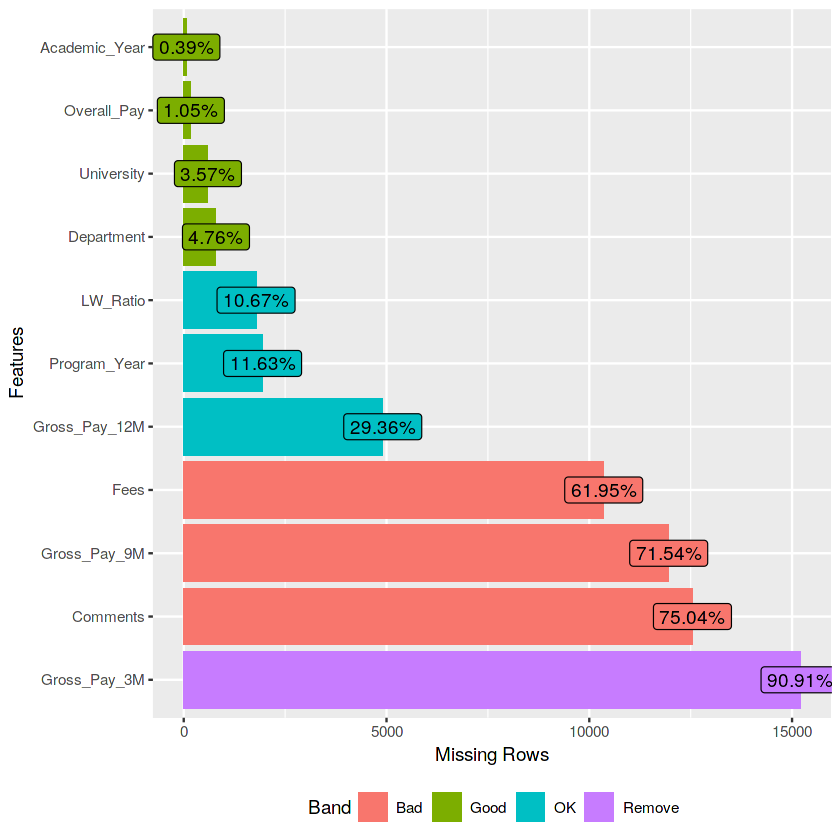

In [4]:
plot_missing(df)

**The variables with a majority of missing values are excluded from the rest of the analysis.**

In [5]:
df <- df %>% select(-c('Fees', 'Gross_Pay_9M', 'Comments', 'Gross_Pay_3M'))

## <div style="background-color:#0A0F29; font-family:'Poppins', cursive; color:#E0F7FA; font-size:100%; text-align:center; border: 2px solid #0A0F29; border-radius:10px; padding: 10px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Convert Salary to numeric</div>

In [6]:
# See https://stackoverflow.com/questions/10294284/remove-all-special-characters-from-a-string-in-r
df$Overall_Pay <- str_replace_all(df$Overall_Pay, "[[:punct:]]", "")
df$Overall_Pay <- str_replace_all(df$Overall_Pay, "[[$]]", "")
df$Overall_Pay <- as.numeric(df$Overall_Pay)

df$Gross_Pay_12M <- str_replace_all(df$Gross_Pay_12M, "[[:punct:]]", "")
df$Gross_Pay_12M <- str_replace_all(df$Gross_Pay_12M, "[[$]]", "")
df$Gross_Pay_12M <- as.numeric(df$Gross_Pay_12M)

Warning message:
“Removed 176 rows containing non-finite values (stat_density).”
Warning message:
“Removed 1783 rows containing non-finite values (stat_density).”


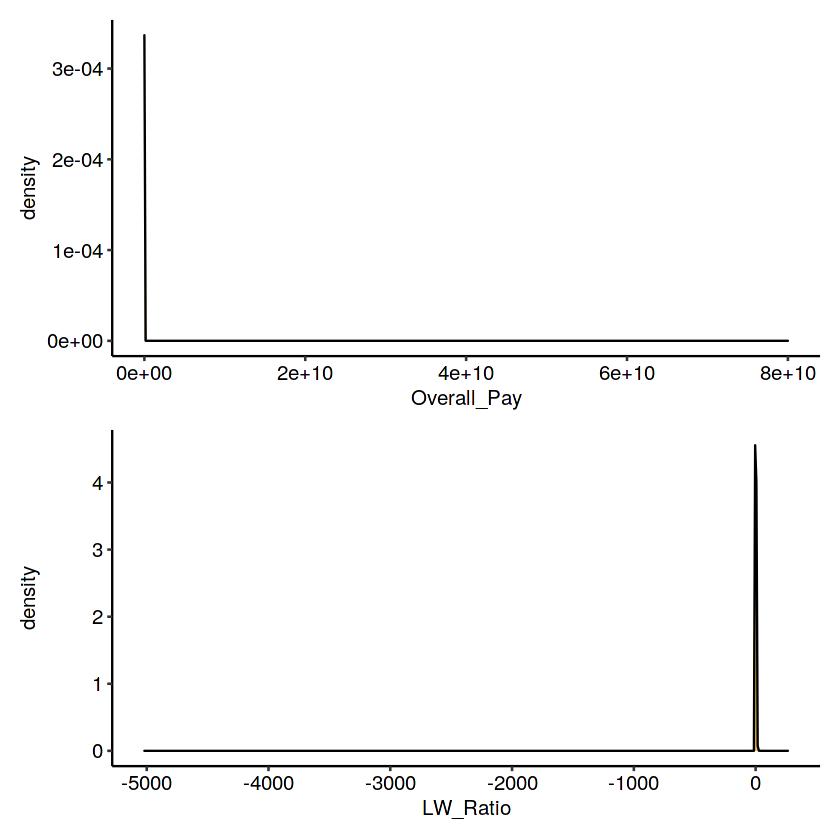

In [7]:
p1 <- ggplot(df) +
    aes(x = Overall_Pay)+
    geom_density(fill = "#E69F00", alpha = 0.7)

p2 <- ggplot(df) +
    aes(x = LW_Ratio)+
    geom_density(fill = "#E69F00", alpha = 0.7)

p1 / p2

**After research PhD salaries in the US are between 15k and 35k. Therefore salaries above 50K are likely entries errors. Salaries under 15K could be legitimates cases and will be examined separately.**

## <div style="background-color:#0A0F29; font-family:'Poppins', cursive; color:#E0F7FA; font-size:100%; text-align:center; border: 2px solid #0A0F29; border-radius:10px; padding: 10px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Convert Program Year to numeric</div>

In [8]:
# This variable could be considered both as categorical and continous
# I will creat 2 variables for data analysis and vizualization 

df$Program_Year <- str_replace_all(df$Program_Year, "1st", "1")
df$Program_Year <- str_replace_all(df$Program_Year, "2nd", "2")
df$Program_Year <- str_replace_all(df$Program_Year, "3rd", "3")
df$Program_Year <- str_replace_all(df$Program_Year, "4th", "4")
df$Program_Year <- str_replace_all(df$Program_Year, "5th", "5")
df$Program_Year <- str_replace_all(df$Program_Year, "6th and up", "6")

df$Seniority_Year <- as.numeric(df$Program_Year)

## <div style="background-color:#0A0F29; font-family:'Poppins', cursive; color:#E0F7FA; font-size:100%; text-align:center; border: 2px solid #0A0F29; border-radius:10px; padding: 10px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Convert Academic Years to factor</div>

In [9]:
# https://cran.r-project.org/web/packages/stringr/vignettes/regular-expressions.html
df$Academic_Year <- str_replace_all(df$Academic_Year, "-....", "")
# data.frame(unique(df$Academic_Year))
df$Academic_Year <- as.Date(df$Academic_Year, "%Y") # After conversion all year start on the 07-12 need to change for first september

df$Academic_Year <- as.character(df$Academic_Year)
df$Academic_Year <- str_replace_all(df$Academic_Year, "-07-18", "-01-09")
df$Academic_Year <- as.Date(df$Academic_Year)

## <div style="background-color:#0A0F29; font-family:'Poppins', cursive; color:#E0F7FA; font-size:100%; text-align:center; border: 2px solid #0A0F29; border-radius:10px; padding: 10px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Universities locations</div>

**By manual inspection we can identify a subset of non american university which represent the majority of this data set. In order to compare US and non US salaries I created an excel file to differentiate salaries by locations.**

In [10]:
# Export univiersities names
university_names <- data.frame(unique(df$University))

# Order the names by alphabetic order
university_names <- university_names %>%
    arrange(unique.df.University.)

# Number of Universities
nrow(university_names)

file_path <- file.path("universities_names.csv")
write_csv(university_names, file_path)

# Add us - non-us category
univ_locations <- read_xlsx(path = "../input/univ-location/univ_location.xlsx", sheet=3)
df <- inner_join(df, univ_locations, by="University")

[1] 900

## <div style="background-color:#0A0F29; font-family:'Poppins', cursive; color:#E0F7FA; font-size:100%; text-align:center; border: 2px solid #0A0F29; border-radius:10px; padding: 10px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Edit departments names</div>

**Several identical departments have different spellings in the data set. Using stringr I corrected these difference in order to identify the most common department and the associated salaries.**

In [11]:
df$department_cleaned <- df$Department

# https://stringr.tidyverse.org/articles/regular-expressions.html

# Convert to lower case
df$department_cleaned <- tolower(df$department_cleaned)

# n/a to NA
df <- df %>% 
    filter(!is.na(department_cleaned)) %>%
    filter(department_cleaned != "n/a")

# Group all bioscience related department to biology
df$department_cleaned <- str_replace_all(df$department_cleaned, ".{0,}bio.{0,}", "biology")
df$department_cleaned <- str_replace_all(df$department_cleaned, ".{0,}cell.{0,}", "biology")
df$department_cleaned <- str_replace_all(df$department_cleaned, ".{0,}molecular.{0,}", "biology")
df$department_cleaned <- str_replace_all(df$department_cleaned, ".{0,}neuro.{0,}", "biology")
df$department_cleaned <- str_replace_all(df$department_cleaned, ".{0,}genetics.{0,}", "biology")

# Group all aerospace department
df$department_cleaned <- str_replace_all(df$department_cleaned, ".{0,}aero.{0,}", "aerospace")
df$department_cleaned <- str_replace_all(df$department_cleaned, ".{0,}space.{0,}", "aerospace")

# Group all health departments
df$department_cleaned <- str_replace_all(df$department_cleaned, ".{0,}health.{0,}", "health")
df$department_cleaned <- str_replace_all(df$department_cleaned, ".{0,}medical.{0,}", "health")
df$department_cleaned <- str_replace_all(df$department_cleaned, ".{0,}clinical.{0,}", "health")
df$department_cleaned <- str_replace_all(df$department_cleaned, ".{0,}pharmacy.{0,}", "health")

# Group all chemistry dept
df$department_cleaned <- str_replace_all(df$department_cleaned, ".{0,}chemical.{0,}", "chemistry")
df$department_cleaned <- str_replace_all(df$department_cleaned, ".{0,}chemistry.{0,}", "chemistry")

# Goup all Computer Science dept
df$department_cleaned <- str_replace_all(df$department_cleaned, ".{0,}comput.{0,}", "computer science")
df$department_cleaned <- str_replace_all(df$department_cleaned, "^computational.{0,}", "computer science")

# Group all physchology dept
df$department_cleaned <- str_replace_all(df$department_cleaned, ".{0,}psych.{0,}", "psychology")

# Group all comm. dept
df$department_cleaned <- str_replace_all(df$department_cleaned, ".{0,}communication.{0,}", "communication")

# Group all physic departments
df$department_cleaned <- str_replace_all(df$department_cleaned, ".{0,}physics.{0,}", "physics")

# Group all agriculture dept
df$department_cleaned <- str_replace_all(df$department_cleaned, ".{0,}agri.{0,}", "agriculture")
df$department_cleaned <- str_replace_all(df$department_cleaned, ".{0,}crop.{0,}", "agriculture")
df$department_cleaned <- str_replace_all(df$department_cleaned, ".{0,}plant.{0,}", "agriculture")

# Group all engineering dept
df$department_cleaned <- str_replace_all(df$department_cleaned, ".{0,}engineering.{0,}", "engineering")
df$department_cleaned <- str_replace_all(df$department_cleaned, ".{0,}mechanical.{0,}", "engineering")

# Group all business dept
df$department_cleaned <- str_replace_all(df$department_cleaned, ".{0,}business.{0,}", "business")

# Group all math dept
df$department_cleaned <- str_replace_all(df$department_cleaned, ".{0,}math.{0,}", "mathematics")

# Group all criminalogy dept
df$department_cleaned <- str_replace_all(df$department_cleaned, ".{0,}crim.{0,}", "criminology")

# Group all geoscience dept
df$department_cleaned <- str_replace_all(df$department_cleaned, ".{0,}earth.{0,}", "geoscience")
df$department_cleaned <- str_replace_all(df$department_cleaned, ".{0,}geo.{0,}", "geoscience")

# Group all english dept
df$department_cleaned <- str_replace_all(df$department_cleaned, ".{0,}english.{0,}", "english")

# List department with at least 50 students
top_dept <- df %>%
    group_by(department_cleaned) %>%
    count() %>%
    arrange(desc(n)) %>%
    filter(n >= 50) %>%
    pull(department_cleaned)

## <div style="background-color:#0A0F29; font-family:'Poppins', cursive; color:#E0F7FA; font-size:100%; text-align:center; border: 2px solid #0A0F29; border-radius:10px; padding: 10px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Filter observation</div>

Excludes observations with:

* missing Overall Pay
* Overall Pay above \$50K which are likely entries errors
* missing LW ratio
* missing Universities
* missing Program Year

In [12]:
df <- df %>%
    filter(!(is.na(Overall_Pay))) %>%
    filter(Overall_Pay <= 50000) %>%
    filter(!is.na(LW_Ratio)) %>%
    filter(!(is.na(Program_Year)))

# <div style="background-color:#0A0F29; font-family:'Poppins', cursive; color:#E0F7FA; font-size:140%; text-align:center; border: 2px solid #00FFFF; border-radius:15px; padding: 15px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Data Visualization</div>

## <div style="background-color:#0A0F29; font-family:'Poppins', cursive; color:#E0F7FA; font-size:100%; text-align:center; border: 2px solid #0A0F29; border-radius:10px; padding: 10px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Compare salaries and living wage ratio by locations</div>

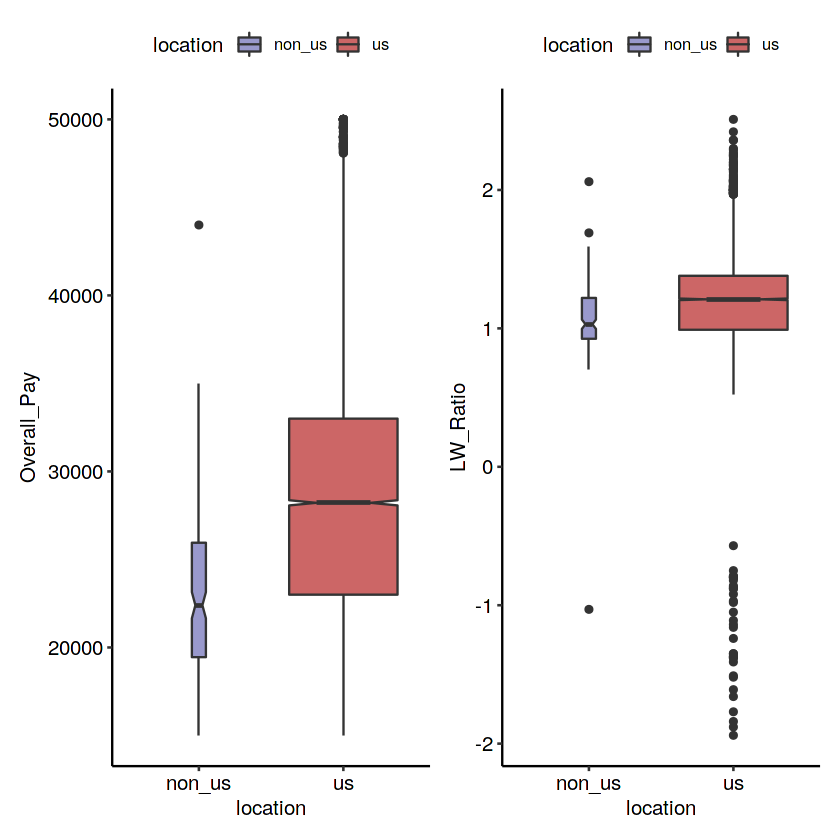

In [13]:
p1 <- df %>%
    filter(Overall_Pay > 15000) %>%
    ggplot() +
    aes(x = location, y = Overall_Pay, fill = location) +
    geom_boxplot(varwidth = TRUE, notch = TRUE) +
    scale_fill_manual(values=c("us" = "#CC6666", "non_us" = "#9999CC"))

p2 <- df %>%
    filter(Overall_Pay > 15000) %>%
    ggplot() +
    aes(x = location, y = LW_Ratio, fill = location) +
    geom_boxplot(varwidth = TRUE, notch = TRUE) +
    scale_fill_manual(values=c("us" = "#CC6666", "non_us" = "#9999CC"))

p1 | p2

We can see on this figure that:

* a majority of observation are from US universities
* the overall pay and living wage ratios are significantly higher in US universities

How many student are paid less than 15K are they located outside the USA?

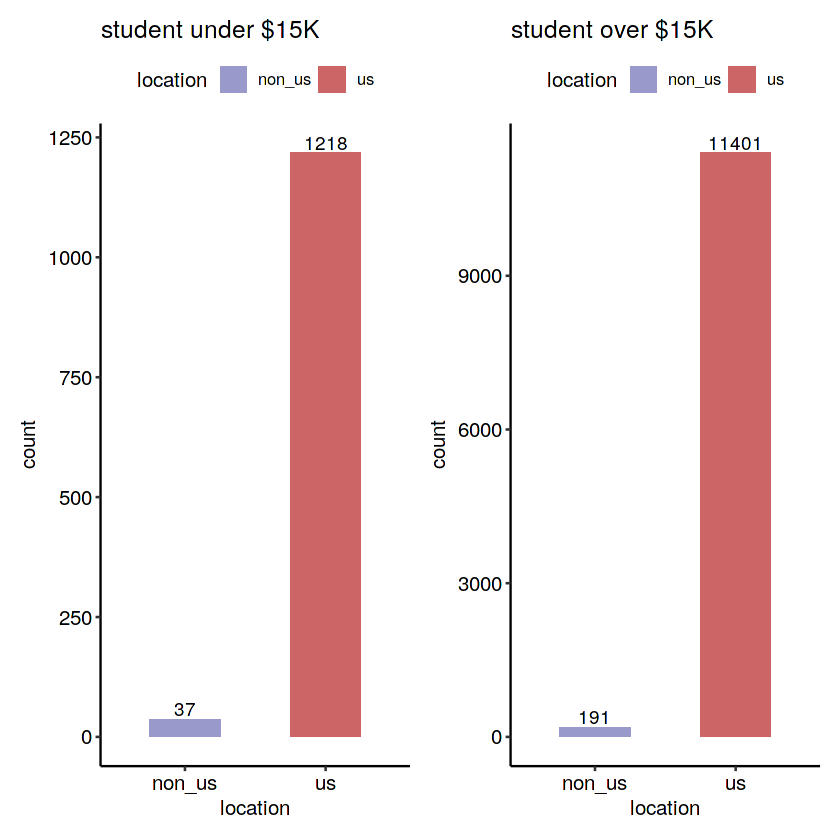

In [14]:
# https://stackoverflow.com/questions/26553526/how-to-add-frequency-count-labels-to-the-bars-in-a-bar-graph-using-ggplot2

p1 <- df %>%
    filter(Overall_Pay <= 15000) %>%
    group_by(location) %>%
    ggplot() +
    aes(x = location, fill = location) +
    geom_bar(width = 0.5) +
    scale_fill_manual(values=c("us" = "#CC6666", "non_us" = "#9999CC")) +
    geom_text(stat='count', aes(label=..count..), vjust=-0.2) +
    ggtitle("student under $15K")

p2 <- df %>%
    filter(Overall_Pay > 15000) %>%
    group_by(location) %>%
    ggplot() +
    aes(x = location, fill = location) +
    geom_bar(width = 0.5) +
    scale_fill_manual(values=c("us" = "#CC6666", "non_us" = "#9999CC")) +
    geom_text(stat='count', aes(label=..count..), vjust=-0.2) +
    ggtitle("student over $15K")

p1 | p2

## <div style="background-color:#0A0F29; font-family:'Poppins', cursive; color:#E0F7FA; font-size:100%; text-align:center; border: 2px solid #0A0F29; border-radius:10px; padding: 10px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Salary per seniority</div>

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


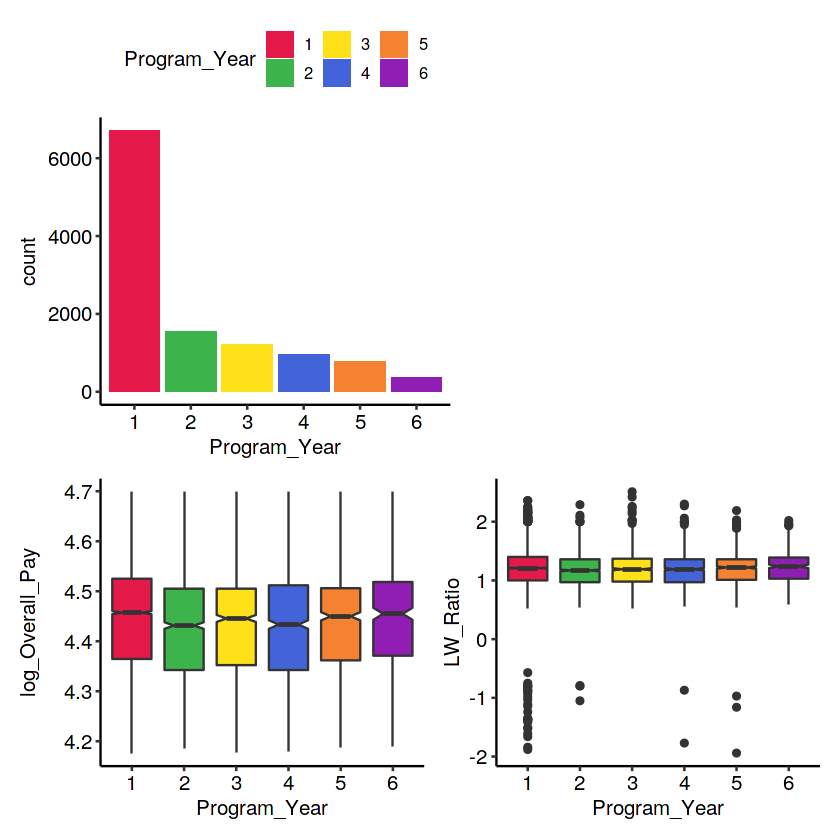

In [15]:
p1 <- df %>%
    filter(Overall_Pay > 15000) %>%
    ggplot() +
    aes(x = Program_Year, fill = Program_Year) +
    geom_bar() +
    scale_fill_manual(values = palette)

p2 <- df %>%
    filter(Overall_Pay > 15000) %>%
    mutate(log_Overall_Pay = log10(Overall_Pay)) %>%
    ggplot() +
    aes(x = Program_Year, y = log_Overall_Pay, fill = Program_Year) +
    geom_boxplot(notch = TRUE) +
    scale_fill_manual(values = palette) +
    guides(fill=FALSE)

p3 <- df %>%
    filter(Overall_Pay > 15000) %>%
    ggplot() +
    aes(x = Program_Year, y = LW_Ratio, fill = Program_Year) +
    geom_boxplot(notch = TRUE) +
    scale_fill_manual(values = palette) +
    guides(fill=FALSE)

(p1 | plot_spacer()) / (p2 | p3)

We can see on this figure that:

* the majority of respondent are in their first year.
* the program year is not linked to the Overall Pay or to the Living Wage ratios.

## <div style="background-color:#0A0F29; font-family:'Poppins', cursive; color:#E0F7FA; font-size:100%; text-align:center; border: 2px solid #0A0F29; border-radius:10px; padding: 10px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Pay and Living wage ration over time</div>

`summarise()` regrouping output by 'Academic_Year' (override with `.groups` argument)

`summarise()` regrouping output by 'Academic_Year' (override with `.groups` argument)



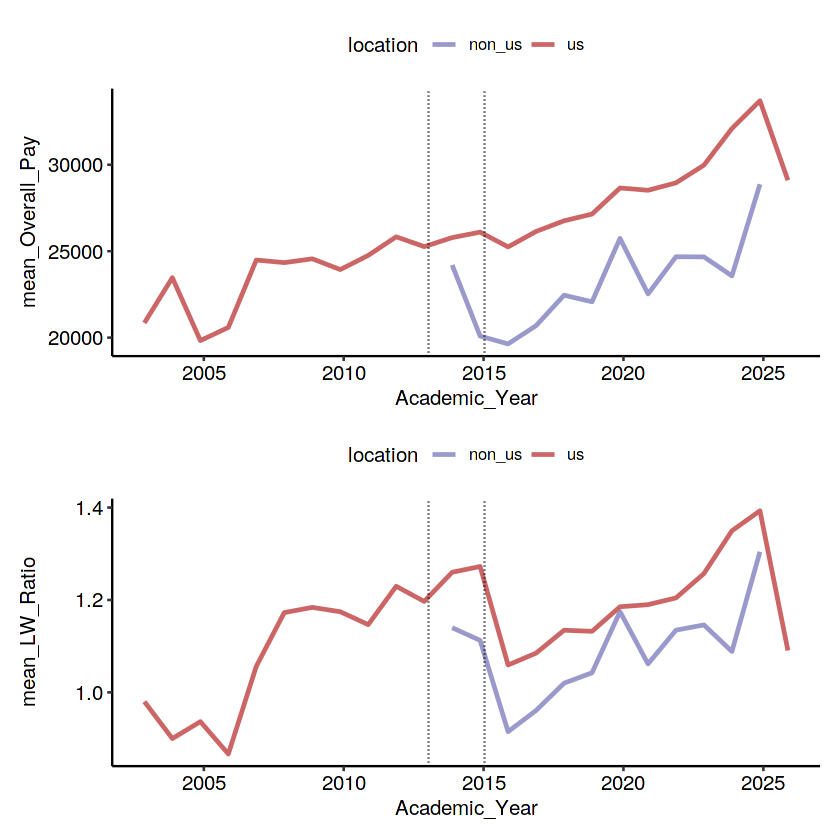

In [16]:
p1 <- df %>%
    filter(!(is.na(Overall_Pay))) %>%
    filter(location %in% c('us', 'non_us')) %>%
    filter(Overall_Pay > 15000) %>%
    filter(!(is.na(Academic_Year))) %>%
    group_by(Academic_Year, location) %>%
    summarise(mean_Overall_Pay = mean(Overall_Pay)) %>%
    ggplot() +
    aes(x=Academic_Year, y=mean_Overall_Pay, group=location, colour=location ) +
    scale_color_manual(values=c("us" = "#CC6666", "non_us" = "#9999CC")) +
    geom_line(size=1) +
    geom_vline(xintercept = as.Date("2013-01-09"), linetype="dotted", color = "black", size=0.5) +
    geom_vline(xintercept = as.Date("2015-01-09"), linetype="dotted", color = "black", size=0.5)

p2 <- df %>%
    filter(!(is.na(Overall_Pay))) %>%
    filter(location %in% c('us', 'non_us')) %>%
    filter(Overall_Pay > 15000) %>%
    filter(!(is.na(Academic_Year))) %>%
    group_by(Academic_Year, location) %>%
    summarise(mean_LW_Ratio = mean(LW_Ratio)) %>%
    ggplot() +
    aes(x=Academic_Year, y=mean_LW_Ratio, group=location, colour=location ) +
    scale_color_manual(values=c("us" = "#CC6666", "non_us" = "#9999CC")) +
    geom_line(size=1) +
    geom_vline(xintercept = as.Date("2013-01-09"), linetype="dotted", color = "black", size=0.5) +
    geom_vline(xintercept = as.Date("2015-01-09"), linetype="dotted", color = "black", size=0.5)

p1 / p2

We can see on this figure that:

* non us universities were included in the data set after 2013
* The mean Overall Pay have been increased over time
* The living wage ratios however have *decreased* internationally after 2014

## <div style="background-color:#0A0F29; font-family:'Poppins', cursive; color:#E0F7FA; font-size:100%; text-align:center; border: 2px solid #0A0F29; border-radius:10px; padding: 10px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Overall Pay and Living wage by department</div>

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



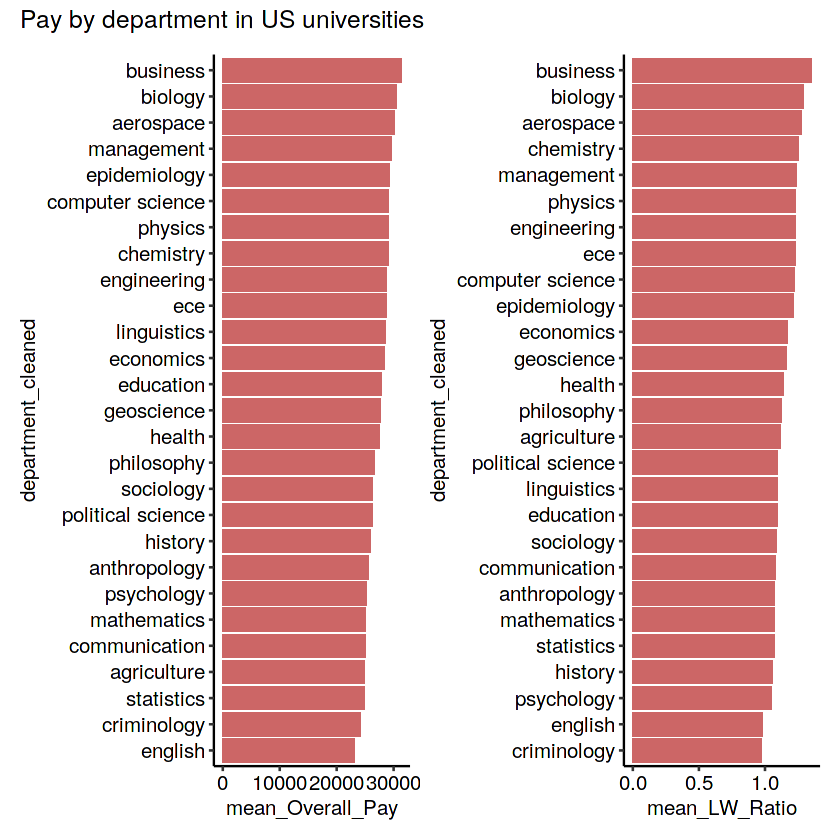

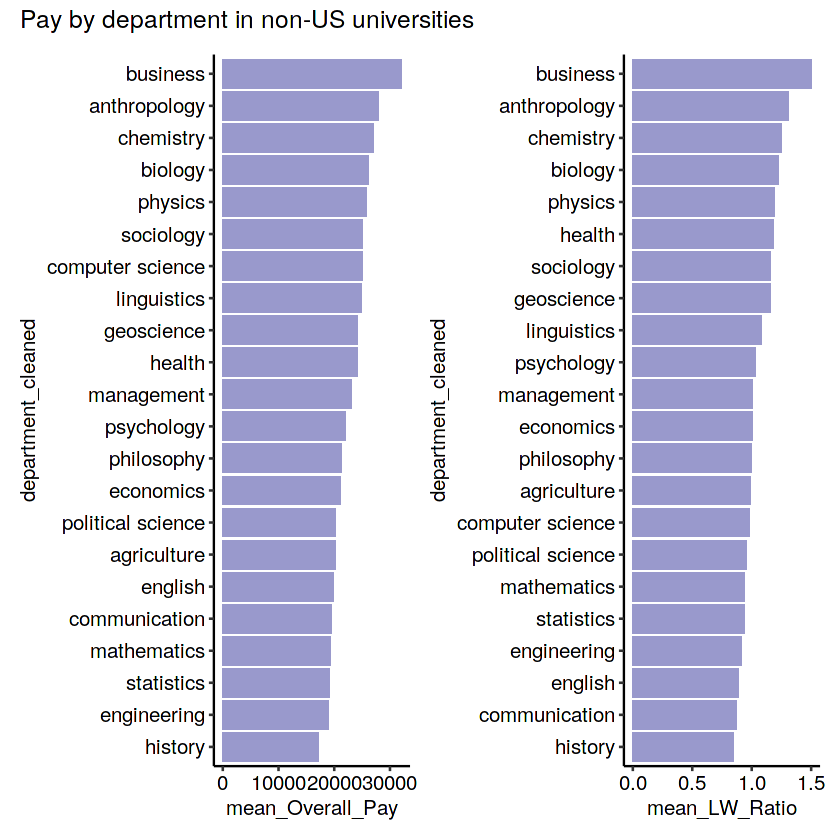

In [17]:
df$department_cleaned <- as.factor(df$department_cleaned)

# US univ
p1 <- df %>%
    filter(department_cleaned %in% top_dept) %>%
    filter(location == 'us') %>%
    filter(Overall_Pay > 15000) %>%
    group_by(department_cleaned) %>%
    summarise(mean_Overall_Pay = mean(Overall_Pay)) %>%
    mutate(department_cleaned = fct_reorder(department_cleaned , mean_Overall_Pay)) %>%
    ggplot() +
    aes(x = department_cleaned, y = mean_Overall_Pay, fill = location) +
    coord_flip() +
    geom_bar(stat = "identity", fill = "#CC6666")

p2 <- df %>%
    filter(department_cleaned %in% top_dept) %>%
    filter(location == 'us') %>%
    filter(Overall_Pay > 15000) %>%
    group_by(department_cleaned) %>%
    summarise(mean_LW_Ratio = mean(LW_Ratio)) %>%
    mutate(department_cleaned = fct_reorder(department_cleaned , mean_LW_Ratio)) %>%
    ggplot() +
    aes(y = department_cleaned, x = mean_LW_Ratio, fill = location) +
    geom_bar(stat = "identity", fill = "#CC6666")

(p1 | p2) +  plot_annotation(title = 'Pay by department in US universities')

# non us univ
p1 <- df %>%
    filter(department_cleaned %in% top_dept) %>%
    filter(!(is.na(Overall_Pay))) %>%
    filter(location == 'non_us') %>%
    filter(Overall_Pay > 15000) %>%
    group_by(department_cleaned) %>%
    summarise(mean_Overall_Pay = mean(Overall_Pay)) %>%
    mutate(department_cleaned = fct_reorder(department_cleaned , mean_Overall_Pay)) %>%
    ggplot() +
    aes(x = department_cleaned, y = mean_Overall_Pay, fill = location) +
    coord_flip() +
    geom_bar(stat = "identity", fill = "#9999CC")

p2 <- df %>%
    filter(department_cleaned %in% top_dept) %>%
    filter(!(is.na(Overall_Pay))) %>%
    filter(location == 'non_us') %>%
    filter(Overall_Pay > 15000) %>%
    group_by(department_cleaned) %>%
    summarise(mean_LW_Ratio = mean(LW_Ratio)) %>%
    mutate(department_cleaned = fct_reorder(department_cleaned , mean_LW_Ratio)) %>%
    ggplot() +
    aes(y = department_cleaned, x = mean_LW_Ratio, fill = location) +
    geom_bar(stat = "identity", fill = "#9999CC")

(p1 | p2) + plot_annotation(title = 'Pay by department in non-US universities')

We can see on this figure that:

* The difference in pay by department are slight in the USA.
* English student are the lowest paid in the USA.
* Business students are the best paid in the USA.
* The pay differences are more marked in non-US universities.
* Healthcare students are the best paid in non-US universities.
* Communication students are the least paid in non-US universities.


# <div style="background-color:#0A0F29; font-family:'Poppins', cursive; color:#E0F7FA; font-size:140%; text-align:center; border: 2px solid #00FFFF; border-radius:15px; padding: 15px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;">Conclusions</div>

### Data collection improvement

This data set required extensive data cleaning on salaries, universities and department names.
The quality of the analysis could be improved by improving the questionnaires filled by students to ensure that:

1. Salaries are entered as numbers.
2. Department choices are entered in an  drop down menu.
3. More international data are collected

### Principal findings

* The Overall Pay and Living Wage ratio is higher in the USA.
* PhD students Living Wage ratios have decreased internationally since 2013.
* Living Wages ratios started to increase again after 2015.
* Business students are the best paid in the USA.
* English students have the lowest paid in the USA.

## Future studies

The following areas could be explored further:

 * compare LW ratio to professional salaries for each given department.
 * compare LW ratio to average student debt by countries.
 * compare salaries to inflation in the USA.

In [18]:
end_time <- Sys.time()

file_path <- "log_info.txt"
date <- format(Sys.time(), "%a %b %d %X %Y")

# See https://www.edureka.co/community/1425/how-to-write-lines-to-a-text-file-in-r    
sink(file_path)
cat("\n")
cat(date)
cat("\n")
cat("#------------------------#")
cat("\n")
cat("Execution time")
cat("\n")
cat(end_time - start_time)
cat("\n")
cat("#------------------------#")
cat("\n")
cat(" Session Info")
print(sessionInfo())
sink()


Sun Nov 17 04:41:48 PM 2024
#------------------------#
Execution time
18.28823
#------------------------#
 Session InfoR version 3.6.3 (2020-02-29)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Debian GNU/Linux 10 (buster)

Matrix products: default
BLAS/LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.3.5.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=C             
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] patchwork_1.0.1.9000 ggpubr_0.4.0         kableExtra_1.1.0    
 [4] knitr_1.29           glue_1.4.1           readxl_1.3.1        
 [7] forcats_0.5.0        stringr_1.4.0        dplyr_1.0

# <div style="background-color:#0A0F29; font-family:'Poppins', cursive; color:#E0F7FA; font-size:140%; text-align:center; border: 2px solid #00FFFF; border-radius:15px; padding: 15px; box-shadow: 5px 5px 20px rgba(0, 0, 0, 0.5); font-weight: bold; letter-spacing: 1px; text-transform: uppercase;"> References</div>

1. [Original Data Source](http://www.phdstipends.com/results)
2. [LW ratio](http://www.phdstipends.com/results)
3. [phd-professor-and-postdoc-salaries-in-the-united-states](https://academicpositions.be/career-advice/phd-professor-and-postdoc-salaries-in-the-united-states)